In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.datasets import make_blobs, make_moons

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN


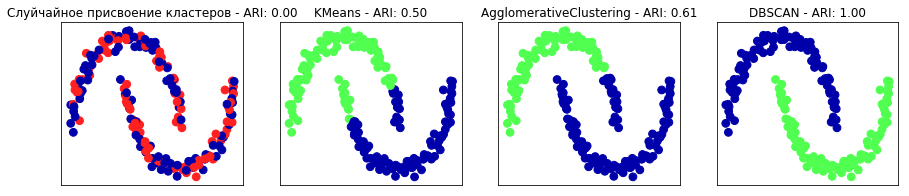

In [2]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Масштабируем данные так, чтобы получить нулеове среднее и единичную дисперсию
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})

#Создаем список используемых алгоритмов
algoritms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# Случайно присваиваем точки двум кластерам
random_state=np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# выводим на графике результаты случайного присвоения кластеров
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c =random_clusters, cmap=mglearn.cm2, s=60)
axes[0].set_title("Слуйчайное присвоение кластеров - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algoritm in zip(axes[1:], algoritms):
    #выводим на графике принадлежность к кластерам и центры кластеров
    clusters = algoritm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title('{} - ARI: {:.2f}'.format(algoritm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [3]:
from sklearn.metrics import accuracy_score

#эти две маркировки точек соответствуют одним и тем же результатам кластеризации
# в clusters1 записаны фактические результаты кластеризации,
# а в clusters2 записаны расчетные результаты кластеризации
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# правильность равна нулю, поскольку ни одна из присвоенных меток не отражает
# истинную кластеризацию
print("Правильность: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# значение скорр. коэффициента Рэнда равно 1, поскольку полученные результаты
# точно воспроизводят истинную кластеризацию
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Правильность: 0.00
ARI: 1.00


# Оценка качества кластеризации без использования метрик предпологающих знание истинной кластеризации

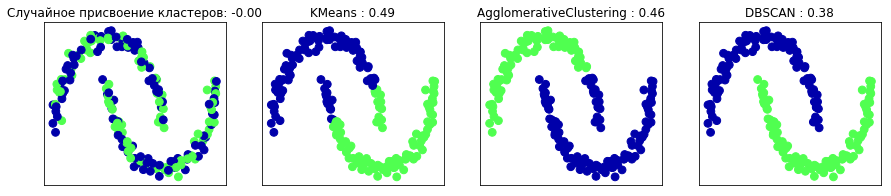

In [4]:
from sklearn.metrics.cluster import silhouette_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})


# выводим на графике результаты случайного присвоения кластеров
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Случайное присвоение кластеров: {:.2f}".format( silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # выводим на графике принадлежность к кластерам и центры кластеров
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
    s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
    silhouette_score(X_scaled, clusters)))

In [5]:
# Сравнение работы алгоритмов на наборе изображений лиц
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whitten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)


TypeError: __init__() got an unexpected keyword argument 'whitten'

# Анализ набора изображений лиц с помошью алгоритма DBSCAN

In [6]:
# применим алгоритм DBSCAN используя номральыне параметры
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print ('Уникеальные метки: {}'.format(np.unique(labels)))

NameError: name 'X_pca' is not defined

In [ ]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print ('Уникеальные метки: {}'.format(np.unique(labels)))

dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print ('Уникеальные метки: {}'.format(np.unique(labels)))

In [ ]:
# Считаем количество точек в кластерах и шум.
# bincount не допускает отрицательных цифр, поэтому нам нужно добавить 1.
# Первая цифра в выводе соответствует количеству шумовых точек.
print("Количество точек на кластер: {}".format(np.bincount(labels + 1)))

In [ ]:
noise = X_people[labels==-1]
fig, axes = plt.sublots(3,9,  subplot_kw={'xticks':(), 'yticks':()})
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [ ]:
for eps in [1,3,5,6,9,11,13]:
    print('\neps={}'.format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print ('Полученые кластеры: {}'.format(np.unique(labels)))
    print ('Размеры кластеров: {}'.format(np.bincount(labels + 1)))

In [ ]:
dbscan = DBSCAN(eps=7, min_samples=3)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == clusters
    n_image = np.sum(mask)
    fig, axes = plt.subplots(1, n_image, figsize=(n_image * 1.5 * 4), subplot_kw={'xticks':(), 'yticks':()})
for image, lable, ax in zip(X_people[mask], y_people[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_name[label].split()[-1])

# Анализ набора изображения лиц с помощью алгоритма k-средних

In [8]:
# извлекаем кластеры с помошью k-средних
km = KMeans(n_clusters=10, random_state=0)
lables_km = km.fit_predict(X_pca)
print ('Размеры кластеров k-средние:{}'.format(np.bincount(lables_km)))

NameError: name 'X_pca' is not defined

In [ ]:
fig, axes = plt.subplots(2,5, subplot_kw={'xticks':(), 'yticks':()}, figsize=(12,4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax,imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

In [9]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
y_people, people.target_names)

NameError: name 'pca' is not defined

# Анализ набора изображения лиц с помощью алгоритма агломеративной кластеризации

In [ ]:
# извлекаем кластеры с помошью агломеративной лкстериазации по методу Варда
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative,fit_predict(X_pca)
print ('Размеры кластеров для агломеративной клстеризации:{}'.format(np.bincount(labels_agg)))

In [ ]:
print ('ARI: {:.2f}'.format(adjusted_rand_score(lables_agg, labels_km)))

In [ ]:
linkage_array = ward(X_pca)
# строим дендограмму для linkage_array
# содержащего расттояния между кластерами
plt.figsize=(20,5)
dendogram(linkage_array, p=7, truncate_msdo='level', no_labels=True)
plt.xlabel('Индекс примера')
plt.ylable('Класстерное расстоняие')

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})

In [ ]:
# Извлекаме кластеры с помошью агломеративной кластеризации по методу Варда
agglomerativ = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerativ.fri_predict(X_pca)
print ('размеры кластеров для аглмю кластеризации: {}'. formzt(np.bincount(labels_agg)))

n_clusters=40
for cluster in [10, 13,19, 22, 36]: # вручную выбранные "интересные" кластеры
    mask = lables_agg == clusters
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel('#{}: {}'.format(cluster, cluster_size))
    for image, lable, asdf in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape, vmin=0, vmax=1))
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize':9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)